# Tutorial - Simulating Loading with the ElastoPlastic class

Before we begin, let us import the necessary modules for this tutorial. Numpy will be used to prepare data for the example simulations, and matplotlib to visualize the results. There are two classes from the *elastoplastic* module that we also need to import, a *material* class holding basical material properties, and the *ElastoPlastic* class used to represent deformed/loaded material.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from elastoplastic import material
from elastoplastic import ElastoPlastic

## Example 1 - Aluminum with Isotropic Hardening
We begin by creating a "material" instance for aluminum with the material properties E, H, and Y_0 (all in GPa).
Then, we create an "ElastoPlastic" instance using the aluminum material, starting with no stress or strain.

In [123]:
alum = material('aluminum', 70, 70/9, 0.095)
elasto_alum = ElastoPlastic(alum, 0, 0)
    

We now define a series of strain increments to apply to the object, and initialize arrays to hold the stress and strain values after each strain increment is applied.

A loop through the strain increments running the *stretch()* method on the object simulates the loading.

In [124]:
strain_incr_array = np.concatenate((np.ones(100) * .003/100, -np.ones(100) * .006/100, np.ones(100) * .003/100), axis=0)
N_steps = strain_incr_array.size
strain = np.zeros(N_steps + 1)
stress = np.zeros(N_steps + 1)
back_stress = np.zeros(N_steps + 1)
yield_stress = np.zeros(N_steps + 1)
strain[0] = elasto_alum.strain
stress[0] = elasto_alum.stress
back_stress[0] = elasto_alum.back_stress
yield_stress[0] = elasto_alum.yield_stress
for i_step in range(1, N_steps + 1):
    elasto_alum.stretch(strain_incr_array[i_step-1], 1, 0)
    strain[i_step] = elasto_alum.strain
    stress[i_step] = elasto_alum.stress
    back_stress[i_step] = elasto_alum.back_stress
    yield_stress[i_step] = elasto_alum.yield_stress

Using matplotlib, we can plot these results (introducing scaling for readibility).

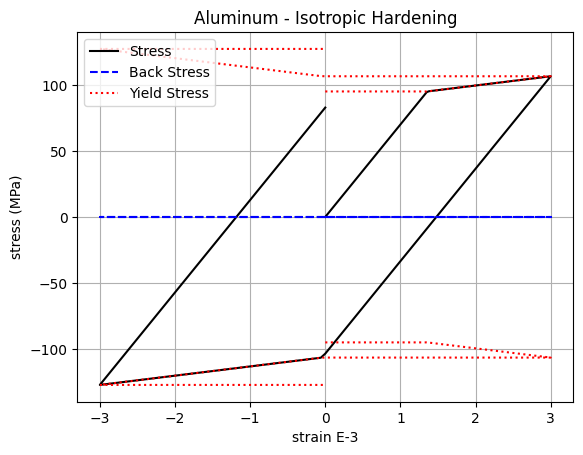

In [125]:
plt.figure()
plt.title("Aluminum - Isotropic Hardening")
plt.plot(strain*10**3, stress*10**3, "-k", label="Stress")
plt.plot(strain*10**3, back_stress*10**3, "--b", label="Back Stress")
plt.plot(strain*10**3, yield_stress*10**3, ":r", label="Yield Stress")
plt.plot(strain*10**3, -yield_stress*10**3, ":r")
plt.xlabel("strain E-3")
plt.ylabel("stress (MPa)")
plt.legend()
plt.grid(True)

As expected in this isotropic hardening case, the back stress does not change, but the yield surface expands when pushed in plastic deformation. In the next example, we look at the very different effects of kinematic hardening.

## Example 2 - Aluminum with Kinematic Hardening

In this example we will use the same starting state (no stress or strain), and the same strain increments, for better comparison. Since this is the case, we only need to re-initialize the *ElastoPlastic* object and run the loop over the strain increments again, this time with the kinematic hardening parameter set to 1, and the isotropic parameter set to 0.

In [126]:
elasto_alum = ElastoPlastic(alum, 0, 0)
for i_step in range(1, N_steps + 1):
    elasto_alum.stretch(strain_incr_array[i_step-1], 0, 1)
    strain[i_step] = elasto_alum.strain
    stress[i_step] = elasto_alum.stress
    back_stress[i_step] = elasto_alum.back_stress
    yield_stress[i_step] = elasto_alum.yield_stress

Plotting as before, except making sure to offset the yield stress curves by the back stress, we have:

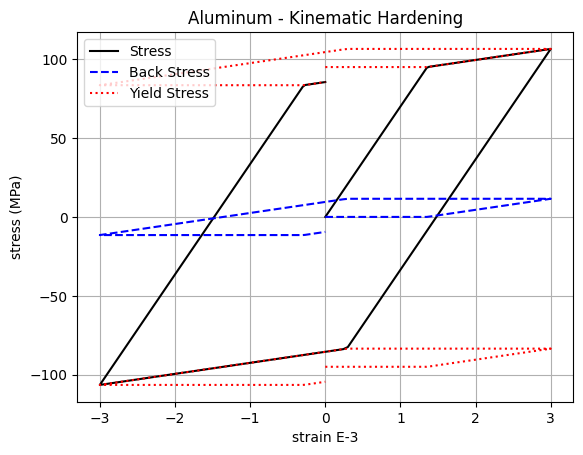

In [127]:
plt.figure()
plt.title("Aluminum - Kinematic Hardening")
plt.plot(strain*10**3, stress*10**3, "-k", label="Stress")
plt.plot(strain*10**3, back_stress*10**3, "--b", label="Back Stress")
plt.plot(strain*10**3, (back_stress+yield_stress)*10**3, ":r", label="Yield Stress")
plt.plot(strain*10**3, (back_stress-yield_stress)*10**3, ":r")
plt.xlabel("strain E-3")
plt.ylabel("stress (MPa)")
plt.legend()
plt.grid(True)

As expected, this time the size of the yield surface remains the same, and only its center (given by the back stress) shifts when under loading in the plastic regime.

Now, let us see if we can correctly predict stresses given different starting values of stress and strain.

## Example 3 - Aluminum with Kinematic Hardening and nonzero starting stress; strain

We again re-initialize an *ElastoPlastic* object, this time using aluminum as the base material with a starting strain of 0.001 and stress of 0.05 GPa. We make sure to adjust the starting values as well.

In [128]:
elasto_alum = ElastoPlastic(alum, .001, .05)
strain[0] = elasto_alum.strain
stress[0] = elasto_alum.stress
back_stress[0] = elasto_alum.back_stress
yield_stress[0] = elasto_alum.yield_stress
for i_step in range(1, N_steps + 1):
    elasto_alum.stretch(strain_incr_array[i_step-1], 0, 1)
    strain[i_step] = elasto_alum.strain
    stress[i_step] = elasto_alum.stress
    back_stress[i_step] = elasto_alum.back_stress
    yield_stress[i_step] = elasto_alum.yield_stress

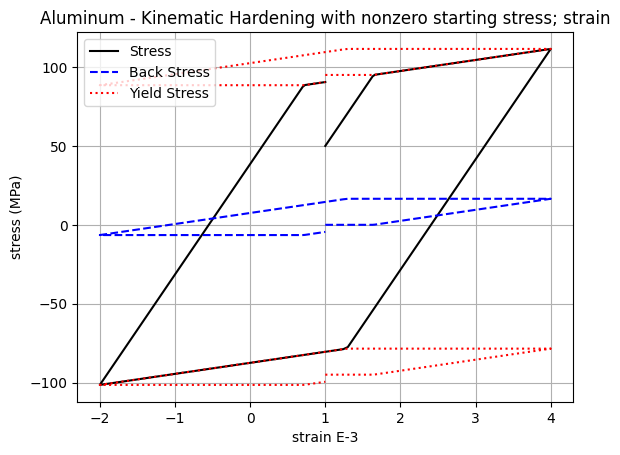

In [129]:
plt.figure()
plt.title("Aluminum - Kinematic Hardening with nonzero starting stress; strain")
plt.plot(strain*10**3, stress*10**3, "-k", label="Stress")
plt.plot(strain*10**3, back_stress*10**3, "--b", label="Back Stress")
plt.plot(strain*10**3, (back_stress+yield_stress)*10**3, ":r", label="Yield Stress")
plt.plot(strain*10**3, (back_stress-yield_stress)*10**3, ":r")
plt.xlabel("strain E-3")
plt.ylabel("stress (MPa)")
plt.legend()
plt.grid(True)

## Example 4 - Aluminum with Isotropic and Kinematic Hardening

We now consider the effects of mixing the two hardening parameters (0.5 each), for the same material and applied strain increments.

In [130]:
elasto_alum = ElastoPlastic(alum, 0, 0)
strain[0] = elasto_alum.strain
stress[0] = elasto_alum.stress
back_stress[0] = elasto_alum.back_stress
yield_stress[0] = elasto_alum.yield_stress
for i_step in range(1, N_steps + 1):
    elasto_alum.stretch(strain_incr_array[i_step-1], .5, .5)
    strain[i_step] = elasto_alum.strain
    stress[i_step] = elasto_alum.stress
    back_stress[i_step] = elasto_alum.back_stress
    yield_stress[i_step] = elasto_alum.yield_stress

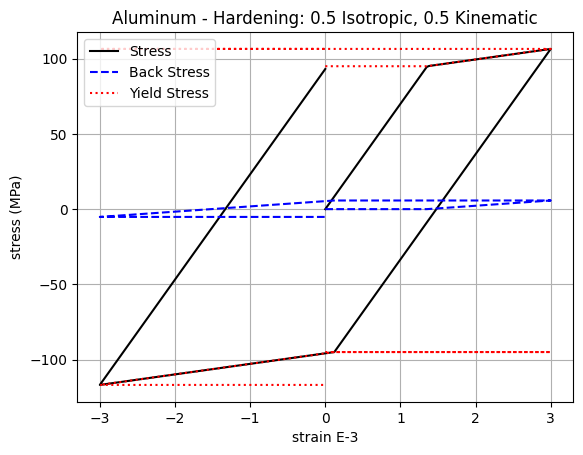

In [131]:
plt.figure()
plt.title("Aluminum - Hardening: 0.5 Isotropic, 0.5 Kinematic")
plt.plot(strain*10**3, stress*10**3, "-k", label="Stress")
plt.plot(strain*10**3, back_stress*10**3, "--b", label="Back Stress")
plt.plot(strain*10**3, (back_stress+yield_stress)*10**3, ":r", label="Yield Stress")
plt.plot(strain*10**3, (back_stress-yield_stress)*10**3, ":r")
plt.xlabel("strain E-3")
plt.ylabel("stress (MPa)")
plt.legend()
plt.grid(True)

Observe the shape of the yield stress curves compared to the back stress - they no longer match, but are stretched! Both the back stress and the yield surface's size change under plastic loading in this scenario. Of course, empirical data would likely be best for deciding which values of the hardening parameters are appropriate to use in specific cases.

As a final example, let us turn to nylon-6 under isotropic hardening.

## Example 5 - Nylon 6 with Isotropic Hardening

In [132]:
nylon = material('nylon6', 3, 3/10, 0.045)
elasto_nylon = ElastoPlastic(nylon, 0, 0)

In [133]:
strain_incr_array = np.concatenate((-np.ones(100) * .03/100, np.ones(100) * .06/100, -np.ones(100) * .03/100), axis=0)
N_steps = strain_incr_array.size
strain = np.zeros(N_steps + 1)
stress = np.zeros(N_steps + 1)
back_stress = np.zeros(N_steps + 1)
yield_stress = np.zeros(N_steps + 1)
strain[0] = elasto_nylon.strain
stress[0] = elasto_nylon.stress
back_stress[0] = elasto_nylon.back_stress
yield_stress[0] = elasto_nylon.yield_stress
for i_step in range(1, N_steps + 1):
    elasto_nylon.stretch(strain_incr_array[i_step-1], 1, 0)
    strain[i_step] = elasto_nylon.strain
    stress[i_step] = elasto_nylon.stress
    back_stress[i_step] = elasto_nylon.back_stress
    yield_stress[i_step] = elasto_nylon.yield_stress

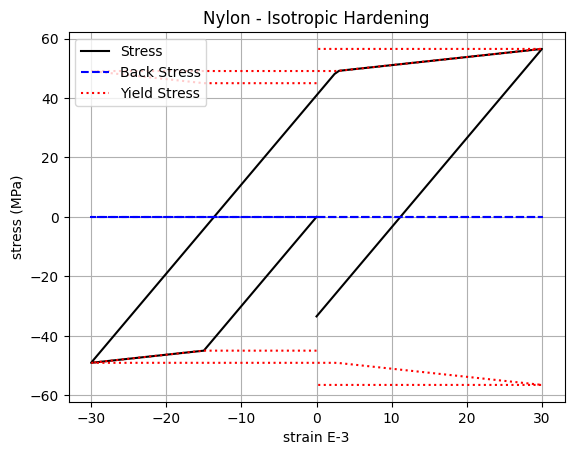

In [134]:
plt.figure()
plt.title("Nylon - Isotropic Hardening")
plt.plot(strain*10**3, stress*10**3, "-k", label="Stress")
plt.plot(strain*10**3, back_stress*10**3, "--b", label="Back Stress")
plt.plot(strain*10**3, (back_stress+yield_stress)*10**3, ":r", label="Yield Stress")
plt.plot(strain*10**3, (back_stress-yield_stress)*10**3, ":r")
plt.xlabel("strain E-3")
plt.ylabel("stress (MPa)")
plt.legend()
plt.grid(True)